In [1]:
# ! python extractPSFParameters.py

In [24]:
# import numpy as np
# [(int(np.round(i)) - 1)*.06+.06 for i in np.logspace(0, 3, 15)]

In [4]:
import matplotlib.pyplot as plt
from analyzePSFParameters import psfParameters
import analysisHelper as helper
test = psfParameters(source='data', baseDir='../')

## Centroid motion

In [5]:
test.loadParameterSet(psfN='15', pix='DSSI')

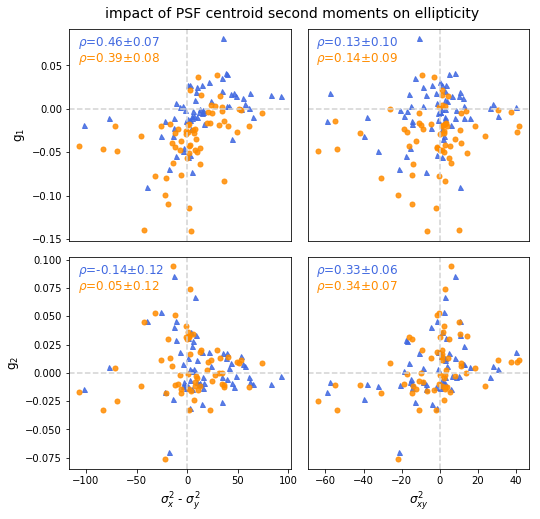

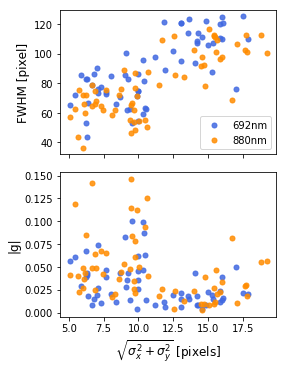

In [4]:
test.plotCentroids(figsize=(8.25,7.5), save=False)

## Color dependence of PSF size

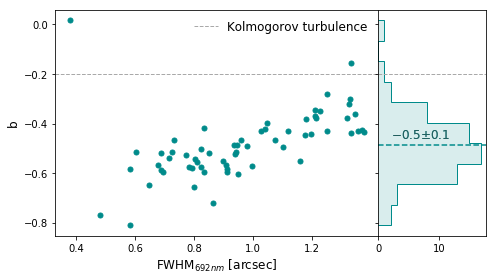

In [30]:
test.chromaticityPlots()

## Plot images of PSFs

In [43]:
files = ['021', '051', '062', '074', '075', '087', '089', '090', '094', '098', '103',
         '1039', '115', '120', '1262', '133', '134', '144', '153', '164', '168', 
         '169', '175', '181', '192', '202', '203', '212', '241', '242', '258', '261', 
         '270', '272', '288', '297', '298', '300', '302', '311', '312', '316', '317',
         '323', '327', '346', '355', '367', '368', '371', '372', '378', '382', '390', 
         '398', '405', '409', '484', '663', '693', '809']

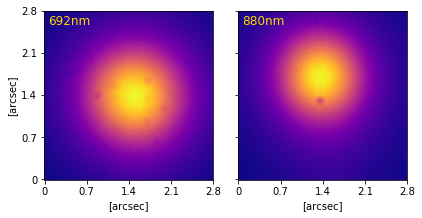

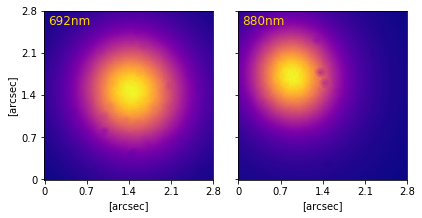

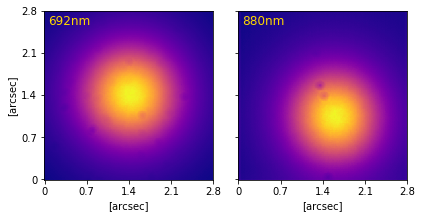

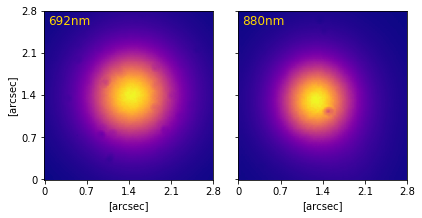

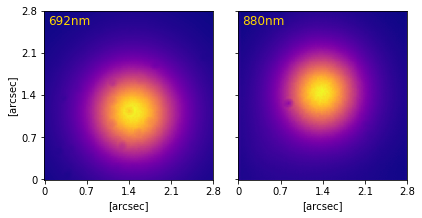

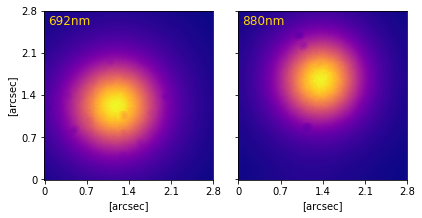

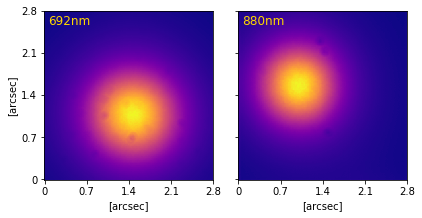

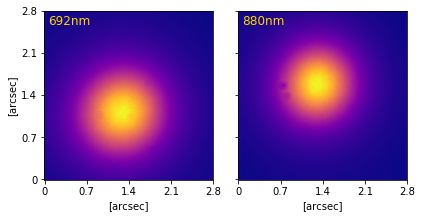

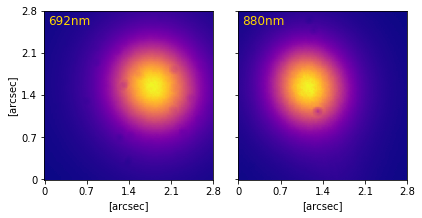

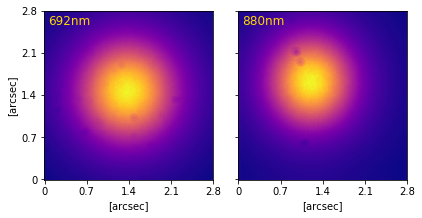

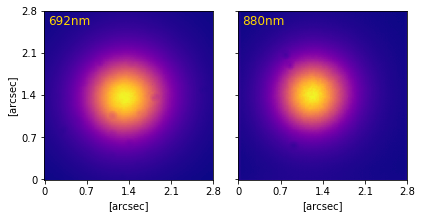

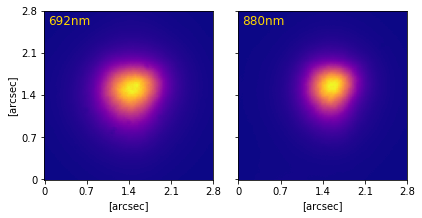

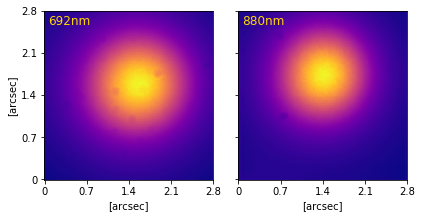

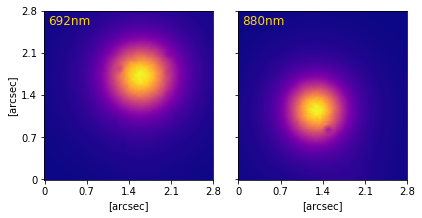

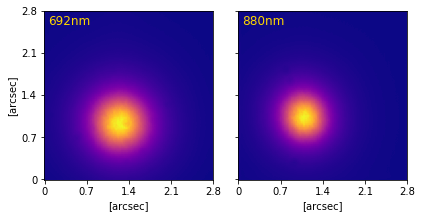

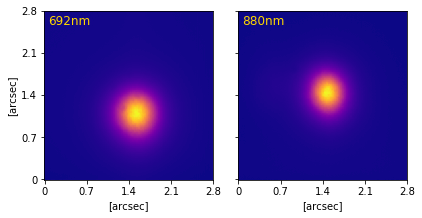

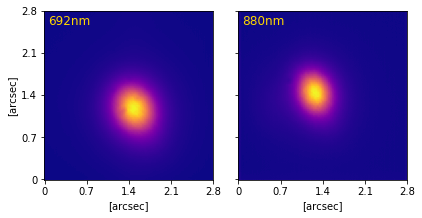

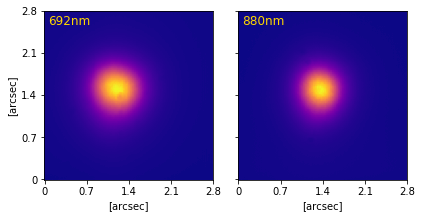

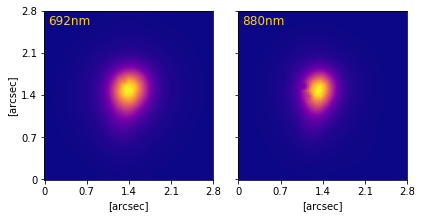

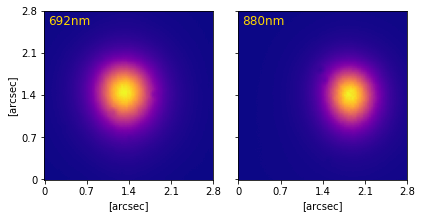

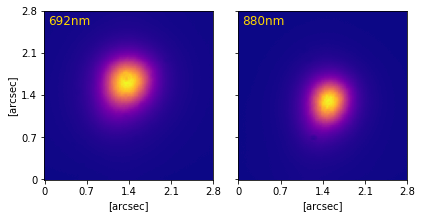

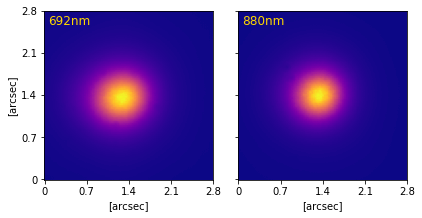

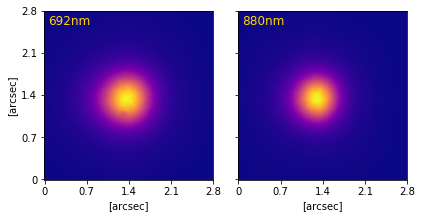

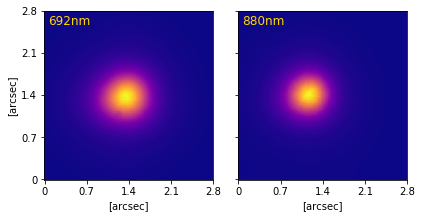

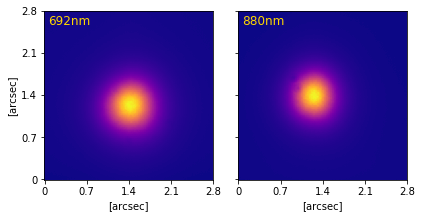

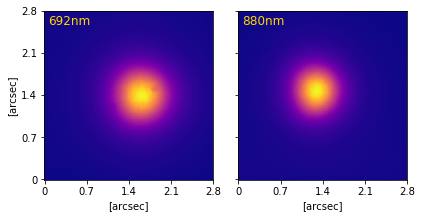

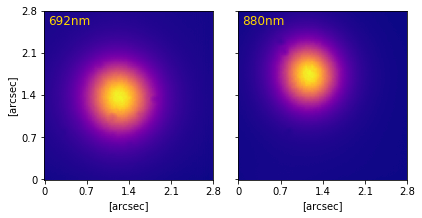

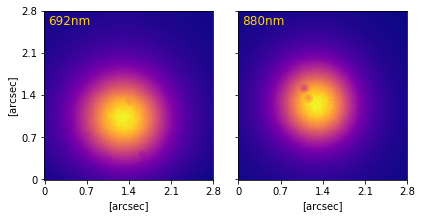

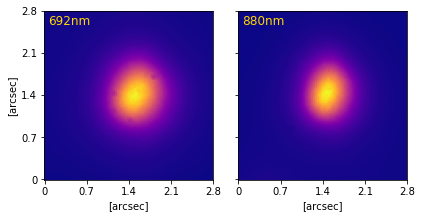

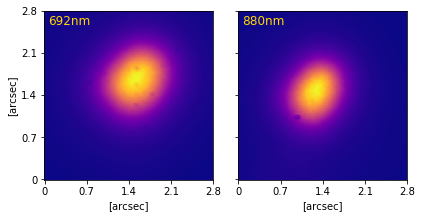

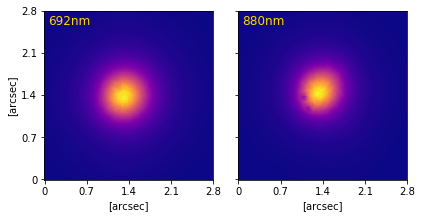

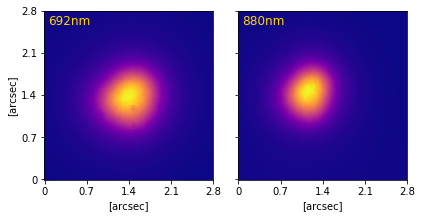

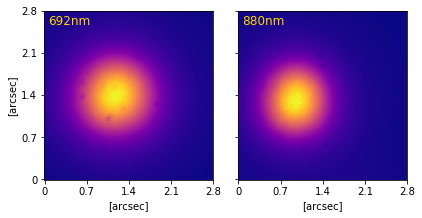

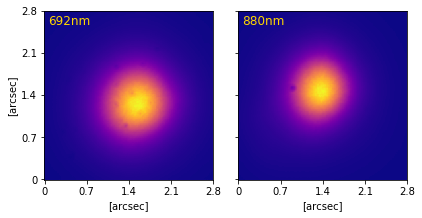

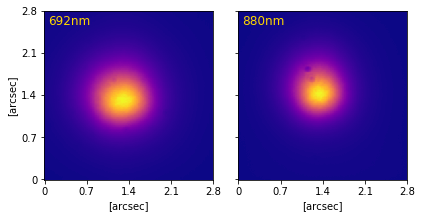

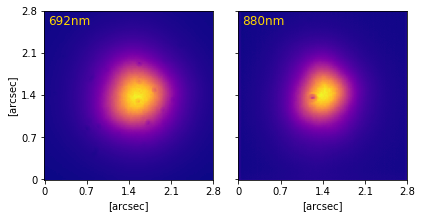

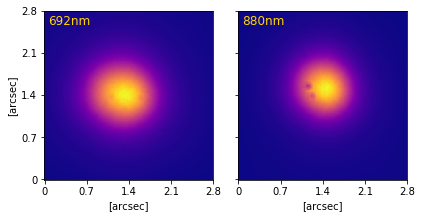

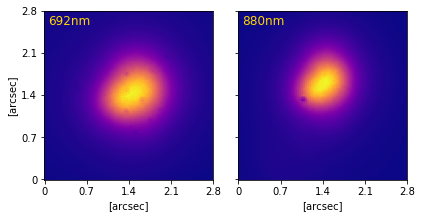

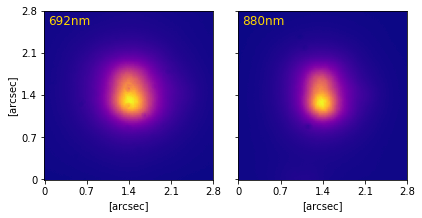

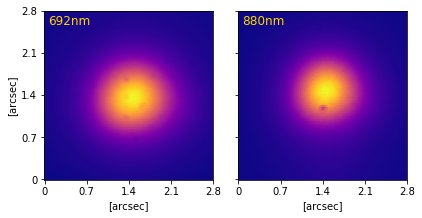

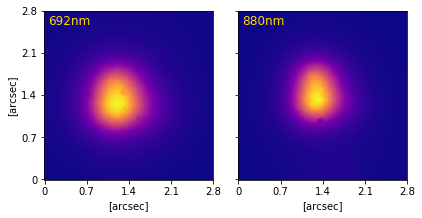

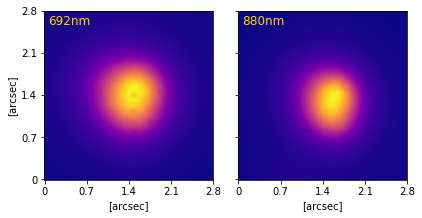

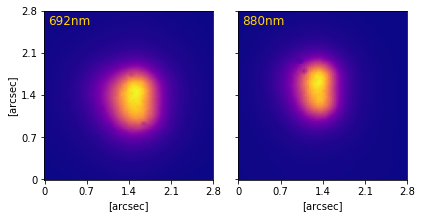

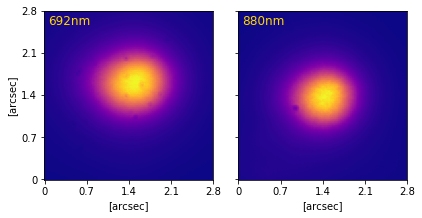

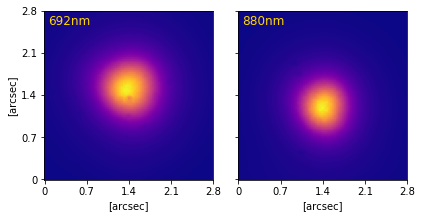

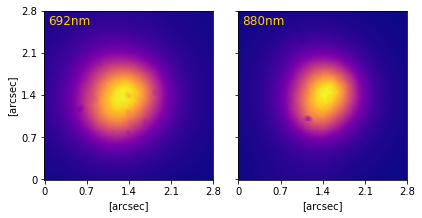

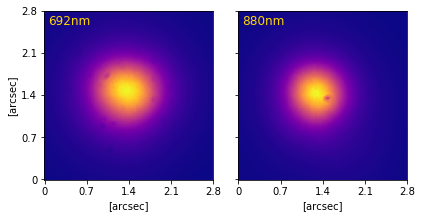

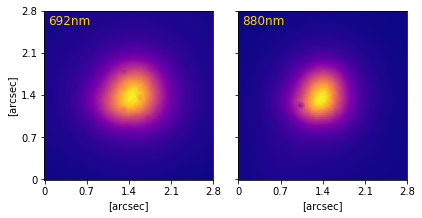

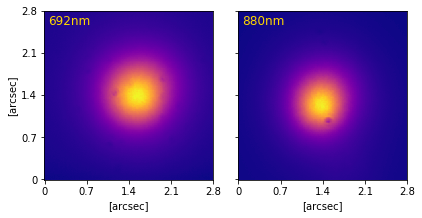

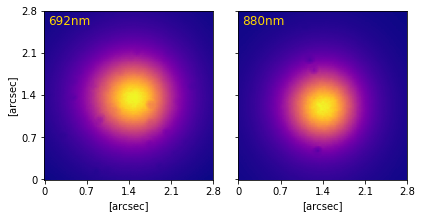

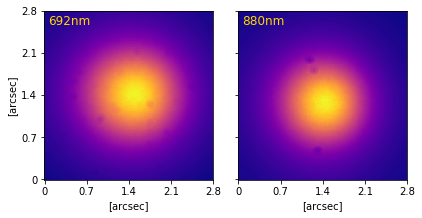

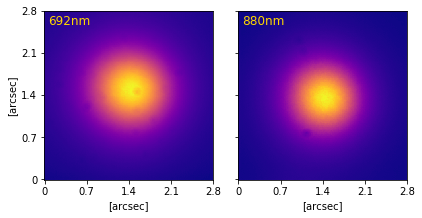

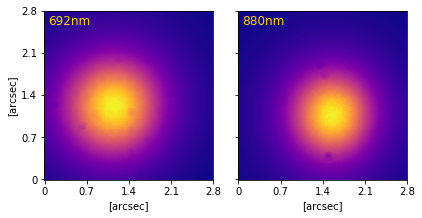

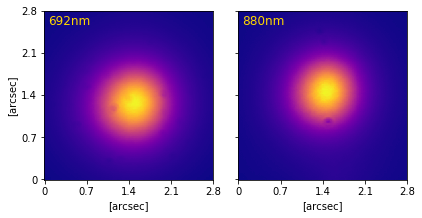

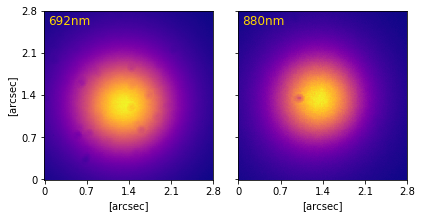

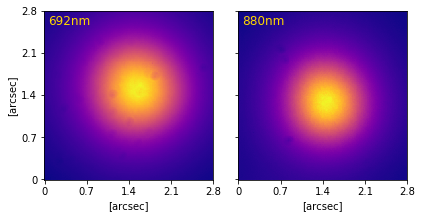

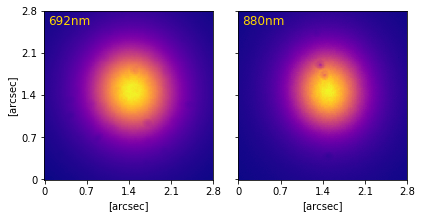

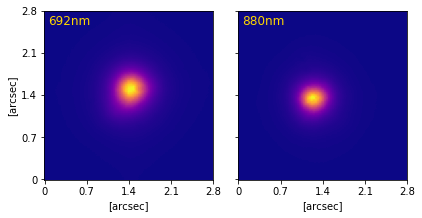

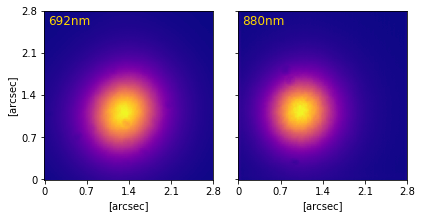

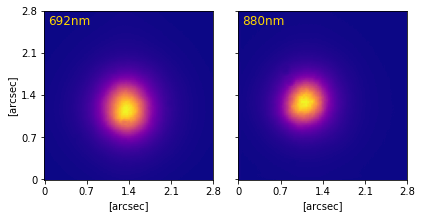

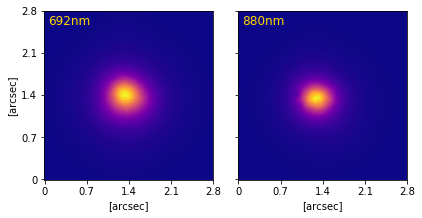

In [82]:
for fileN in files:
    helper.imagePSF(fileN, expTime=[0,1000], save=False)
# helper.imagePSF('169', expTime=[500,1000], save=True)

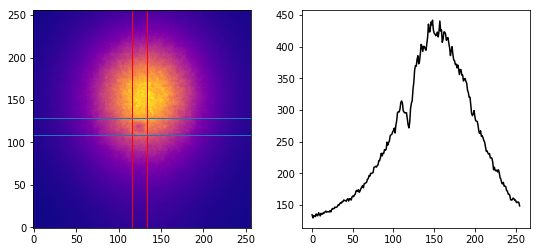

In [114]:
from astropy.io import fits
hdu = fits.open('/global/cscratch1/sd/chebert/rawSpeckles/img_{}_{}.fits'.format('b', files[0]))
dataB = hdu[0].data
hdu.close()

exps=40
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.imshow(dataB[0:exps].mean(axis=0), origin='lower', cmap='plasma')
plt.axvline(116, color='r', linewidth=1)
plt.axvline(133, color='r', linewidth=1)
plt.axhline(minX-10, linewidth=1)
plt.axhline(minX+10, linewidth=1)

slicex = dataB[0:exps,:,124].mean(axis=0)
# minX = 110+slicex[110:200].argmin()
# maxX = 110+slicex[110:200].argmax()
plt.subplot(122)
plt.plot(slicex, 'k');

# print(f'dark spot is {100*(slicex[minX]/slicex[maxX]):.1f}% dimmer than max')

In [113]:
grid = np.zeros((256,256))
xline = np.linspace(116,133,17)
yline = np.linspace(minX-10,maxX+10,20)
for i in range(256):
    for j in range(256):
        grid[i,j] = 1 if xline

## Image quality

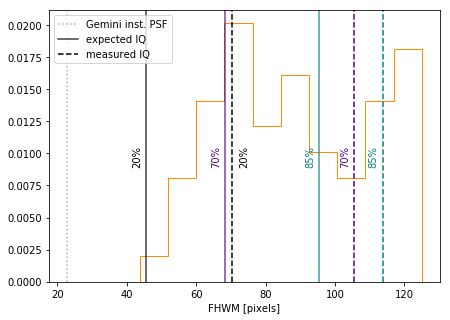

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

fig = plt.figure(figsize=(7,5))

ax = plt.subplot(111)
ax.hist(test.parameters['15']['DSSI']['a']['size'][:,-1], density=True, histtype='step', color='darkorange')
a_quants = np.quantile(test.parameters['15']['DSSI']['a']['size'][:,-1], [.2,.7,.85])
ax.set_xlabel('FHWM [pixels]')
lims = ax.axis()
ax.axvline(22.7, alpha=0.5, linestyle=':', label='Gemini inst. PSF')
ax.axvline(45.5, linestyle='-', color='k', alpha=0.75, label='expected IQ')
ax.text(45.5-4, .01, '20%', color='k', rotation=90)
ax.axvline(68.2, linestyle='-', color='indigo', alpha=0.75)
ax.text(68.2-4, .01, '70%', color='indigo', rotation=90)
ax.axvline(95.5, linestyle='-', color='teal', alpha=0.75)
ax.text(95.5-4, .01, '85%', color='teal', rotation=90)
ax.axvline(a_quants[0], linestyle='--', color='k', label='measured IQ')
ax.text(a_quants[0]+2, .01, '20%', color='k', rotation=90)
ax.axvline(a_quants[1], linestyle='--', color='indigo')
ax.text(a_quants[1]-4, .01, '70%', color='indigo', rotation=90)
ax.axvline(a_quants[2], linestyle='--', color='teal')
ax.text(a_quants[2]-4, .01, '85%', color='teal', rotation=90)

ax.legend(loc=2)
plt.show()

## Plot ellipticity components

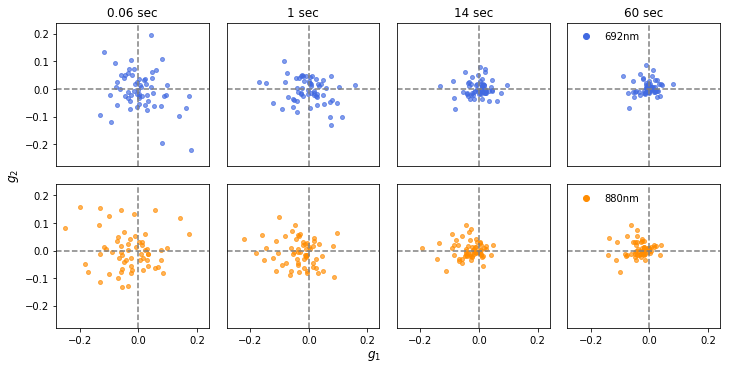

In [5]:
test.plotEComps(pix='DSSI', save=False);

## Compare 30s PSF parameters:

In [6]:
test.analyzeBinnedParameters('DSSI')

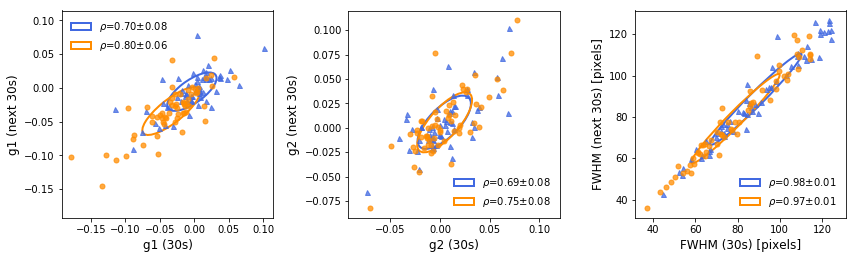

In [7]:
test.plot30sParameters('DSSI', psfN='2', figsize=(12,3.7), ellipse=True, save=False,
                          ellipseArgs={'linewidth':2, 'linestyle':'-'}, alpha=0.75,plotArgs={'ms':5})

## 15 sec ellipticity

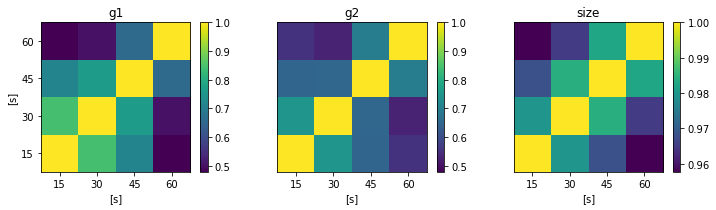

In [3]:
import numpy as np
plt.figure(figsize=(12,2.75))
fifteenSec = np.ones((3,4,4))
for k in range(3):
    param = ['g1','g2','size'][k]
    for i in range(4):
        for j in range(i,4):
            if i!=j:
                fifteenSec[k,i,j] = test.R['4']['DSSI'][param]['a'][f'{i}{j}']
                fifteenSec[k,j,i] = test.R['4']['DSSI'][param]['a'][f'{i}{j}']

vmin, vmax = np.min(fifteenSec[:2]), np.max(fifteenSec[:2])
for k in range(3):
    param = ['g1','g2','size'][k]
    plt.subplot(1,3,k+1)
    if k<2:
        plt.imshow(fifteenSec[k], origin='lower', vmin=vmin, vmax=vmax)
    else: plt.imshow(fifteenSec[k], origin='lower')
    plt.colorbar()
    plt.title(param)
    plt.xticks([0,1,2,3],[15,30,45, 60])
    if k == 0: 
        plt.ylabel('[s]')
        plt.yticks([0,1,2,3],[15,30,45, 60])
    else: plt.yticks([])
    plt.xlabel('[s]')
plt.show()

loading in correct dataset...


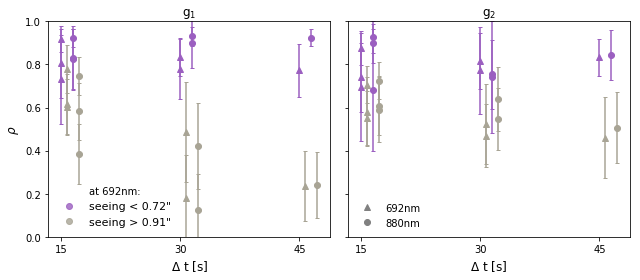

In [4]:
test.plotCorrelations('4', 10, nSplit2=25, figsize=(9,4), colors=['#9b5fc0', '#a8a495'], save=True)

## 5s ellipticity

loading in correct dataset...


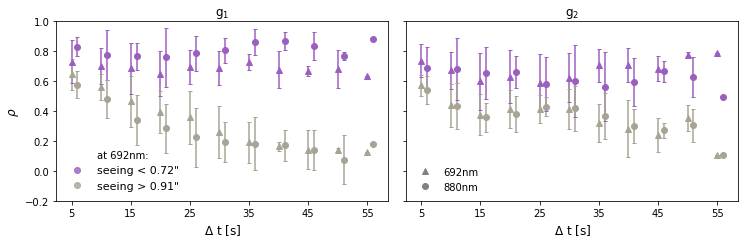

In [3]:
test.plotCorrelations('12', 10, nSplit2=25, colors=['#9b5fc0', '#a8a495'], save=True)
# 137e6d, 8f99fb, 0f9b8e

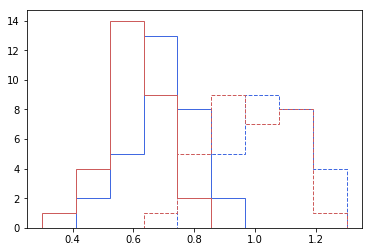

In [15]:
import numpy as np
nSplit = 30
sortedIdx = np.argsort(np.stack([test.parameters['12']['DSSI']['a']['size'].mean(axis=1), 
                                 test.parameters['12']['DSSI']['b']['size'].mean(axis=1)]).mean(axis=0))
bins=np.linspace(30,130, 10)*.01
plt.hist(test.parameters['12']['DSSI']['a']['size'][sortedIdx[:nSplit],-1]*.01, 
         bins=bins, histtype='step', color=test.col['a'])
plt.hist(test.parameters['12']['DSSI']['a']['size'][sortedIdx[nSplit:],-1]*.01, 
         bins=bins, histtype='step', linestyle='--', color=test.col['a'])
plt.hist(test.parameters['12']['DSSI']['b']['size'][sortedIdx[:nSplit],-1]*.01, 
         bins=bins, histtype='step', color=test.col['b'])
plt.hist(test.parameters['12']['DSSI']['b']['size'][sortedIdx[nSplit:],-1]*.01, 
         bins=bins, histtype='step', linestyle='--', color=test.col['b'])
plt.show()

## Plot ellipticity dropoff

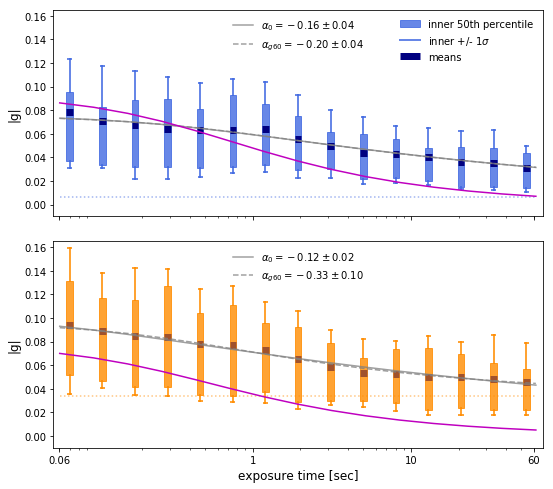

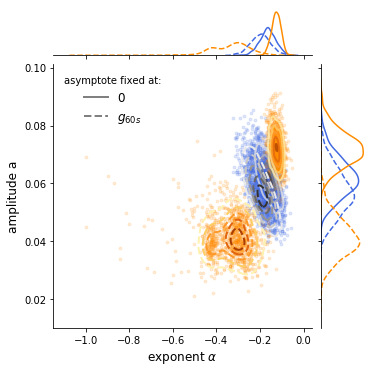

In [6]:
test.analyzeEMag(pix='DSSI', plot=True, expectedAsymptote=True, save=False, delay=True, overlay=True)

In [7]:
test.eDropoff['DSSI']['zero'], test.eDropoff['DSSI']['g60']

(array([[ 0.06179708, -0.16320268, -0.29200997],
        [ 0.07140577, -0.12255517, -0.05558364]]),
 array([[ 0.05591933, -0.19623967, -0.36052723],
        [ 0.03993208, -0.32688777, -0.2654235 ]]))

### Trying fit on each dataset independently

In [8]:
import numpy as np
pix='DSSI'
ellipticity = np.array([np.sqrt(test.parameters['15'][pix]['a']['g1']**2 +
                                test.parameters['15'][pix]['a']['g2']**2),
                        np.sqrt(test.parameters['15'][pix]['b']['g1']**2 +
                                test.parameters['15'][pix]['b']['g2']**2)])
ellipticity.shape

(2, 61, 15)

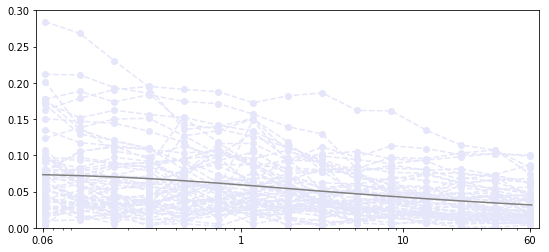

In [14]:
figsize=(9, 4)
color = 'a'
fig = plt.figure(1, figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(-.25,14.25)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_ylim(0,.3)
  
pts = np.logspace(-1.22,1.79,15)

logAx = fig.add_subplot(111, label="2", frame_on=False)
logAx.set_yticks([])
logAx.set_xscale('log')
logAx.set_xlim((0.055,.068*1000))
logAx.set_xticks([.06, 1, 10, 60])
logAx.set_xticklabels([.06, 1, 10, 60])

params = np.zeros((61,3))
for i in range(61):
    ax.plot(ellipticity[0][i],'o--', color='lavender')
    params[i] = helper.fitDropoff(ellipticity[:,i], delay=True)[0]
#     logAx.plot(pts, helper.powerLaw(pts, params), color='lightgrey', alpha=.5)
meanParams = helper.fitDropoff(ellipticity.mean(axis=1), delay=True)[0]
logAx.plot(pts, helper.powerLaw(pts, meanParams), color='grey', alpha=1)
logAx.set_ylim(0,.3)
logAx.axvline(meanParams[2])
plt.show()

In [16]:
np.log10(logAx.get_xlim())

array([-1.25963731,  1.83250891])

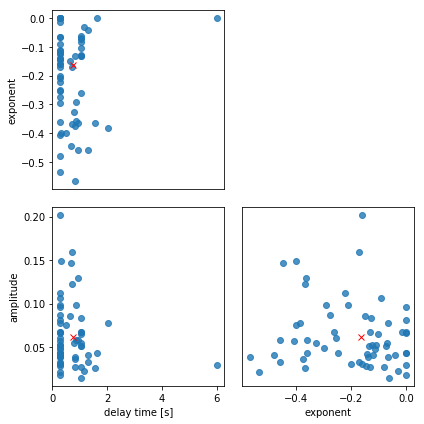

In [7]:
plt.figure(figsize=(6,6))
plt.subplot(221)
plt.plot(np.exp(params[:,2]), params[:,1], 'o', alpha=0.8)
plt.plot(np.exp(meanParams[2]), meanParams[1], 'rx')
plt.ylabel('exponent')
plt.xticks([])
plt.subplot(223)
plt.plot(np.exp(params[:,2]), params[:,0], 'o', alpha=0.8)
plt.plot(np.exp(meanParams[2]), meanParams[0], 'rx')
plt.xlabel('delay time [s]')
plt.ylabel('amplitude');
plt.subplot(224)
plt.plot(params[:,1], params[:,0], 'o', alpha=0.8)
plt.plot(meanParams[1], meanParams[0], 'rx')
plt.xlabel('exponent')
plt.yticks([]);
plt.tight_layout();

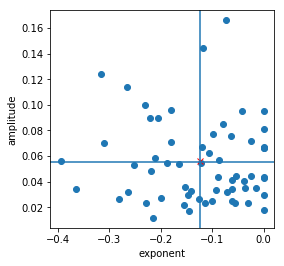

In [76]:
plt.figure(figsize=(4,4))
plt.plot(params[:,0], params[:,1], 'o')
plt.plot(params.mean(axis=0)[0],test.eDropoff['DSSI']['zero'][0][1],'rx')
plt.axhline(params.mean(axis=0)[1])
plt.axvline(params.mean(axis=0)[0])
plt.xlabel('exponent')
plt.ylabel('amplitude');